<a href="https://colab.research.google.com/github/Alz-517/T.A.M_2025-2/blob/main/Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultados:
a = [3. 7.], b = [8 2]
t* (analítico) = 0.5588235294117647
t  (gradiente) = 0.5588235294121158
Proy. analítica = [4.47058824 1.11764706]
Proy. gradiente = [4.47058824 1.11764706]


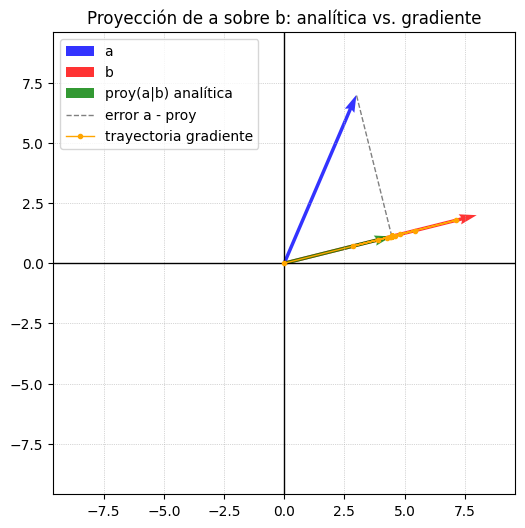

In [ ]:
# -*- coding: utf-8 -*-
"""
Proyección lineal en 2D: solución analítica y por gradiente descendente.
Autor: ChatGPT (modificado y comentado por Google Colab AI)

Uso:
    - Edite los vectores a y b en el bloque "if __name__ == '__main__':"
    - Ejecute la celda.
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Solución Analítica ---
# La proyección de un vector 'a' sobre un vector 'b' (proy(a|b)) se define como:
# proy(a|b) = t* * b
# donde t* es el escalar que minimiza la distancia entre 'a' y t*b.
# Matemáticamente, t* se encuentra minimizando ||a - t*b||^2, lo que lleva a la solución:
# t* = (a · b) / (b · b)
def proyeccion_analitica(a, b):
    """
    Calcula la proyección analítica del vector a sobre el vector b.

    Args:
        a (np.ndarray): Vector a (en 2D).
        b (np.ndarray): Vector b (en 2D) sobre el cual proyectar.

    Returns:
        tuple: Una tupla que contiene:
            - proj (np.ndarray): El vector proyección de a sobre b.
            - t_star (float): El escalar t* que define la proyección.
    """
    # Aseguramos que los vectores sean arrays de numpy y tengan la forma correcta (2,)
    a = np.asarray(a, dtype=float).reshape(2,)
    b = np.asarray(b, dtype=float).reshape(2,)

    # Verificamos que el vector b no sea el vector nulo, ya que no se puede proyectar sobre él.
    if np.allclose(b, 0):
        raise ValueError("El vector b es cero; no es posible proyectar sobre un vector nulo.")

    # Calculamos el escalar t* usando la fórmula analítica
    t_star = np.dot(a, b) / np.dot(b, b)

    # Calculamos el vector proyección
    proj = t_star * b

    return proj, t_star

# --- Solución por Gradiente Descendente ---
# El problema de encontrar la proyección de 'a' sobre 'b' es equivalente a encontrar
# el escalar 't' que minimiza la función de costo (error cuadrático):
# f(t) = ||a - t*b||^2
# Esta función es cuadrática en 't', convexa, y su mínimo se puede encontrar
# utilizando el método de gradiente descendente.
# La derivada de f(t) con respecto a t (el gradiente) es:
# grad(f(t)) = 2 * ( (b · b) * t - (a · b) )
# La regla de actualización del gradiente descendente es:
# t_nuevo = t_anterior - learning_rate * grad(f(t_anterior))
def proyeccion_gradiente(a, b, lr=0.2, tol=1e-10, max_iter=100000, t0=0.0):
    """
    Calcula la proyección del vector a sobre el vector b utilizando gradiente descendente.

    Args:
        a (np.ndarray): Vector a (en 2D).
        b (np.ndarray): Vector b (en 2D) sobre el cual proyectar.
        lr (float): Tasa de aprendizaje (learning rate).
        tol (float): Tolerancia para la convergencia.
        max_iter (int): Número máximo de iteraciones.
        t0 (float): Valor inicial de t.

    Returns:
        tuple: Una tupla que contiene:
            - proj (np.ndarray): El vector proyección de a sobre b.
            - t (float): El escalar t encontrado por gradiente descendente.
            - historia (np.ndarray): Un array con el historial de iteraciones (k, t, f, grad).
    """
    # Aseguramos que los vectores sean arrays de numpy y tengan la forma correcta (2,)
    a = np.asarray(a, dtype=float).reshape(2,)
    b = np.asarray(b, dtype=float).reshape(2,)

    # Verificamos que el vector b no sea el vector nulo.
    if np.allclose(b, 0):
        raise ValueError("El vector b es cero; no es posible proyectar sobre un vector nulo.")

    # Pre-calculamos b·b y a·b para optimizar los cálculos en el bucle
    bb = float(np.dot(b, b))
    ab = float(np.dot(a, b))

    # Validamos la tasa de aprendizaje. Debe ser positiva y menor que 1/(b·b)
    # para garantizar convergencia en este problema cuadrático.
    if lr <= 0 or lr >= 1.0 / bb:
        raise ValueError(f"La tasa de aprendizaje lr debe cumplir 0 < lr < 1/(b·b) = {1.0/bb:.6g}.")

    # Inicializamos t con el valor inicial proporcionado
    t = float(t0)
    # Lista para almacenar el historial de cada iteración
    historia = []

    # Bucle principal del gradiente descendente
    for k in range(int(max_iter)):
        # Calculamos el residuo (error)
        residuo = a - t * b
        # Calculamos la función de costo (error cuadrático)
        f = float(np.dot(residuo, residuo))
        # Calculamos el gradiente de la función de costo con respecto a t
        grad = 2.0 * (bb * t - ab)
        # Almacenamos el estado actual en el historial
        historia.append((k, t, f, grad))

        # Actualizamos t usando la regla del gradiente descendente
        t_nuevo = t - lr * grad

        # Verificamos la condición de convergencia: si el cambio en t es menor que la tolerancia
        if abs(t_nuevo - t) < tol:
            t = t_nuevo # Actualizamos t a la última estimación
            break       # Salimos del bucle

        # Actualizamos t para la siguiente iteración
        t = t_nuevo

    # Calculamos el vector proyección final con el valor de t encontrado
    proj = t * b

    # Convertimos el historial a un array de numpy para facilitar su manipulación posterior
    return proj, t, np.array(historia, dtype=float)

# --- Ejecución y Visualización ---
# Este bloque se ejecuta cuando el script se corre directamente.
if __name__ == '__main__':
    # Definimos los vectores de ejemplo
    a = np.array([3.0, 7.0])
    b = np.array([8, 2])

    # --- Solución Analítica ---
    # Calculamos la proyección y el escalar t* usando la función analítica
    proj_analitica, t_star = proyeccion_analitica(a, b)

    # --- Preparación para Gradiente Descendente ---
    # Calculamos b·b para determinar un rango válido para la tasa de aprendizaje (lr)
    bb = np.dot(b, b)
    # Elegimos una tasa de aprendizaje que cumpla la condición de convergencia (0 < lr < 1/(b·b))
    # Aquí usamos 80% del límite superior como ejemplo.
    lr = 0.8 * (1.0 / bb)

    # --- Solución por Gradiente Descendente ---
    # Calculamos la proyección, el escalar t, y el historial de iteraciones
    proj_grad, t_grad, historial = proyeccion_gradiente(a, b, lr=lr, tol=1e-12, max_iter=100000, t0=0.0)

    # --- Impresión de Resultados ---
    print("Resultados:")
    print(f"a = {a}, b = {b}")
    print(f"t* (analítico) = {t_star}")
    print(f"t  (gradiente) = {t_grad}")
    print(f"Proy. analítica = {proj_analitica}")
    print(f"Proy. gradiente = {proj_grad}")

    # --- Gráfico de Visualización ---
    # Creamos una figura y ejes para el gráfico
    fig = plt.figure(figsize=(6, 6))
    # Dibujamos los ejes x e y
    plt.axhline(0, linewidth=1, color='black')
    plt.axvline(0, linewidth=1, color='black')

    # Dibujamos los vectores a y b desde el origen (0,0)
    plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='a', alpha=0.8)
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='red', label='b', alpha=0.8)

    # Dibujamos el vector proyección analítica
    plt.quiver(0, 0, proj_analitica[0], proj_analitica[1], angles='xy', scale_units='xy', scale=1, color='green', label='proy(a|b) analítica', alpha=0.8)

    # Dibujamos la línea de error (vector a - proy(a|b))
    plt.plot([proj_analitica[0], a[0]], [proj_analitica[1], a[1]], linestyle='--', linewidth=1, color='gray', label='error a - proy')

    # Dibujamos la trayectoria del gradiente descendente
    if historial is not None and len(historial) > 0:
        # Calculamos los puntos correspondientes a cada iteración (t_k * b)
        puntos = np.outer(historial[:, 1], b)
        # Graficamos la secuencia de puntos
        plt.plot(puntos[:, 0], puntos[:, 1], marker='o', linestyle='-', linewidth=1, markersize=3, color='orange', label='trayectoria gradiente')

    # Configuramos el aspecto del gráfico para que sea cuadrado
    plt.gca().set_aspect('equal', adjustable='box')

    # Ajustamos los límites de los ejes para que todos los vectores sean visibles
    # Encontramos el valor máximo absoluto de las coordenadas para establecer los límites
    lim = np.max(np.abs(np.concatenate([a, b, proj_analitica])))
    # Añadimos un margen para una mejor visualización
    lim = max(1.0, 1.2 * lim)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # Agregamos una cuadrícula y configuramos la leyenda y el título
    plt.grid(True, linewidth=0.5, linestyle=':')
    plt.legend(loc='best')
    plt.title('Proyección de a sobre b: analítica vs. gradiente')

    # Mostramos el gráfico
    plt.show()

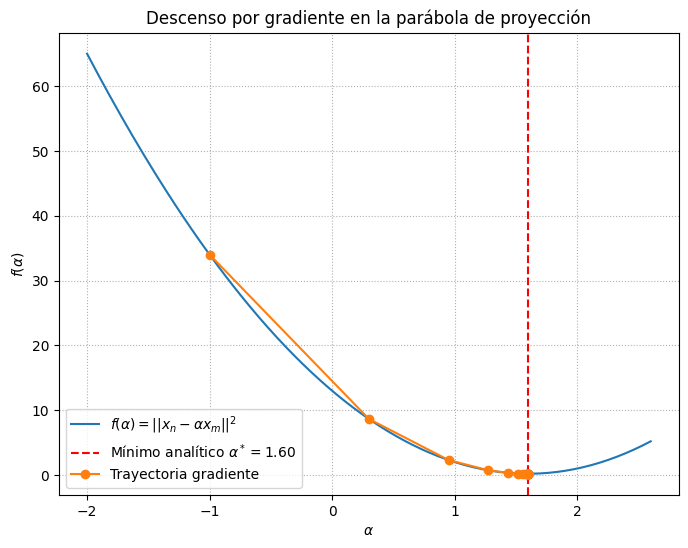

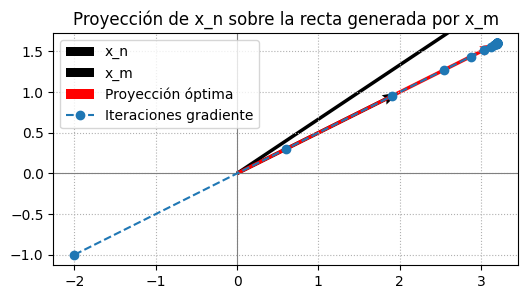

α* (analítico): 1.6
Último α (gradiente): 1.5999999999999976
Proyección óptima: [3.2 1.6]
Última proyección gradiente: [3.2 1.6]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# Definición de vectores
# =============================
x_n = np.array([3.0, 2.0])   # vector a proyectar
x_m = np.array([2.0, 1.0])   # vector base

# Parámetros de gradiente
lr = 0.05       # tasa de aprendizaje (η)
max_iter = 50   # iteraciones
alpha0 = -1.0   # inicialización

# =============================
# Función y gradiente
# =============================
def f(alpha, x_n, x_m):
    return np.linalg.norm(x_n - alpha * x_m)**2

def grad_f(alpha, x_n, x_m):
    return 2 * (alpha * np.dot(x_m, x_m) - np.dot(x_n, x_m))

# =============================
# Solución analítica
# =============================
alpha_star = np.dot(x_n, x_m) / np.dot(x_m, x_m)
proj_star = alpha_star * x_m

# =============================
# Gradiente descendente
# =============================
alphas = [alpha0]
values = [f(alpha0, x_n, x_m)]
proyecciones = [alpha0 * x_m]

alpha = alpha0
for _ in range(max_iter):
    g = grad_f(alpha, x_n, x_m)
    alpha = alpha - lr * g
    alphas.append(alpha)
    values.append(f(alpha, x_n, x_m))
    proyecciones.append(alpha * x_m)

alphas = np.array(alphas)
values = np.array(values)
proyecciones = np.array(proyecciones)

# =============================
# 1) Gráfico de la parábola
# =============================
alpha_range = np.linspace(min(alphas)-1, max(alphas)+1, 200)
f_range = [f(a, x_n, x_m) for a in alpha_range]

plt.figure(figsize=(8,6))
plt.plot(alpha_range, f_range, label=r"$f(\alpha)=||x_n - \alpha x_m||^2$")
plt.axvline(alpha_star, color="red", linestyle="--", label=fr"Mínimo analítico $\alpha^*={alpha_star:.2f}$")
plt.plot(alphas, values, marker="o", linestyle="-", label="Trayectoria gradiente")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$f(\alpha)$")
plt.title("Descenso por gradiente en la parábola de proyección")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

# =============================
# 2) Gráfico en 2D de los vectores
# =============================
plt.figure(figsize=(6,6))
# Ejes
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)

# Vectores
plt.quiver(0,0,x_n[0],x_n[1],angles="xy",scale_units="xy",scale=1,label="x_n")
plt.quiver(0,0,x_m[0],x_m[1],angles="xy",scale_units="xy",scale=1,label="x_m")

# Proyección óptima
plt.quiver(0,0,proj_star[0],proj_star[1],angles="xy",scale_units="xy",scale=1,color="red",label="Proyección óptima")

# Trayectoria de proyecciones intermedias
plt.plot(proyecciones[:,0], proyecciones[:,1], marker="o", linestyle="--", label="Iteraciones gradiente")

plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.grid(True, linestyle=":")
plt.title("Proyección de x_n sobre la recta generada por x_m")
plt.show()

print("α* (analítico):", alpha_star)
print("Último α (gradiente):", alphas[-1])
print("Proyección óptima:", proj_star)
print("Última proyección gradiente:", proyecciones[-1])


Saving BradPitt2.webp to BradPitt2 (3).webp
Saving BradPitt.webp to BradPitt (3).webp
Saving ZacEfron.webp to ZacEfron (3).webp
Matriz de errores de proyección (más pequeño = más parecido):
Error entre imagen 1 y 2: 18.1141
Error entre imagen 1 y 3: 18.5105
Error entre imagen 2 y 1: 23.9163
Error entre imagen 2 y 3: 25.1657
Error entre imagen 3 y 1: 25.2697
Error entre imagen 3 y 2: 26.0204

Las imágenes más parecidas son: 1 y 2


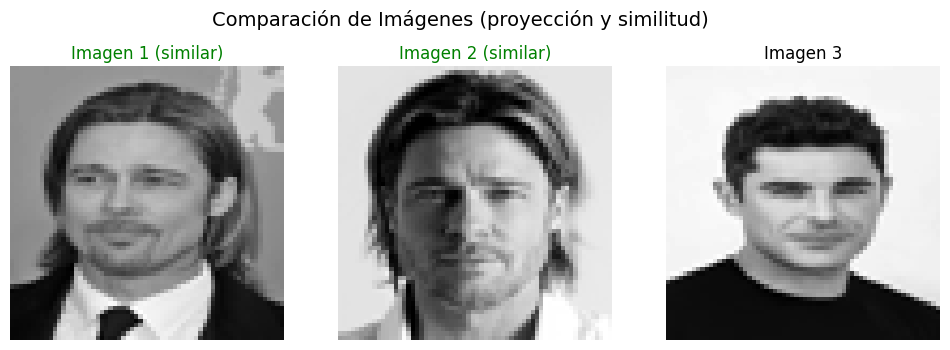

In [ ]:
# =========================================
# 1. Subida y carga de imágenes
# =========================================
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Subir imágenes
uploaded = files.upload()

# Leer y vectorizar
def load_and_vectorize(path, size=(64,64)):
    """
    Abre una imagen, la convierte a escala de grises,
    la redimensiona a 'size' y la vectoriza en un arreglo 1D.
    """
    img = Image.open(path).convert("L")  # escala de grises
    img = img.resize(size)               # normalizar tamaño
    arr = np.array(img, dtype=float) / 255.0  # normalizar a [0,1]
    return arr.flatten(), img

# Convertimos todas las imágenes subidas en vectores y guardamos las originales
image_paths = list(uploaded.keys())
data = [load_and_vectorize(p) for p in image_paths]
vectors = [d[0] for d in data]
images  = [d[1] for d in data]

# =========================================
# 2. Función de proyección y error
# =========================================
def projection(a, b):
    """Proyección de a sobre b."""
    return (np.dot(a,b) / np.dot(b,b)) * b

def projection_error(a, b):
    """Error de proyectar a sobre b."""
    return np.linalg.norm(a - projection(a,b))

# =========================================
# 3. Comparación entre imágenes
# =========================================
n = len(vectors)
errors = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i != j:
            errors[i,j] = projection_error(vectors[i], vectors[j])

# Encontrar las imágenes más parecidas
min_idx = np.unravel_index(np.argmin(errors + np.eye(n)*1e9), errors.shape)
closest_pair = (min_idx[0], min_idx[1])

# =========================================
# 4. Mostrar resultados
# =========================================
print("Matriz de errores de proyección (más pequeño = más parecido):")
for i in range(n):
    for j in range(n):
        if i != j:
            print(f"Error entre imagen {i+1} y {j+1}: {errors[i,j]:.4f}")

print(f"\nLas imágenes más parecidas son: {closest_pair[0]+1} y {closest_pair[1]+1}")

# =========================================
# 5. Visualización
# =========================================
fig, axes = plt.subplots(1, n, figsize=(12,4))

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    if i in closest_pair:
        ax.set_title(f"Imagen {i+1} (similar)", color="green")
    else:
        ax.set_title(f"Imagen {i+1}")
    ax.axis("off")

plt.suptitle("Comparación de Imágenes (proyección y similitud)", fontsize=14)
plt.show()
